# Tarea 1
1. Consiga el conjunto de datos iris.csv. (ver enlace adjunto)
2. Escriba una clase iterable que tenga la siguiente funcionalidad
    
    2.1 Al instanciar un objeto, lee el archivo de datos y lo coloca en un dataframe interno en la clase.
    
    2.2 Cada vez que se le pidan datos, debe regresar los dos siguientes datos.
    
    2.3 Imprima "error" si los datos se han agotado.

Pruebe su clase

3. Escriba una clase con las siguientes funcionalidades:
    
    3.1 Al instanciar un objeto, lee un conjunto de datos numéricos. Por ejemplo puede usar el mismo conjunto de datos iris.csv. Instancie los datos en un dataframe de Pandas.
    
    3.2 Implemente un método que calcule las estadísticas descriptivas básicas de cada una de las variables (sepal.length, sepal.width, petal.length, etc)
    
    3.3 Implemente un método que entregue los nombre de las variables disponibles.
    
    3.3 Implemente un método que reciba el nombre de una variable disponible dentro del objeto (en el dataframe) y regrese: sus estadísticas básicas: media, mediana, desviación, percentiles q25, q50, q75 y dibuje un histograma de la distribución de la variable.

Pruebe su clase.

Construya dos cuadernos. Uno por cada clase implementada y probada.

## 1) Consiga el conjunto de datos iris.csv.

In [8]:
import pandas as pd
import numpy as np
# Forma 1: descargando los datos de un .csv local
# iris = pd.read_csv('iris.csv')
# iris.head()

# Forma 2:
from sklearn.datasets import load_iris

# Cargamos el dataset iris
iris = load_iris()


## 2) Clase iterable
    2.1) Al instanciar un objeto, lee el archivo de datos y lo coloca en un dataframe interno en la clase.
    2.2) Cada vez que se le pidan datos, debe regresar los dos siguientes datos.
    2.3) Imprima "error" si los datos se han agotado.
    

In [1]:
import pandas as pd
# Creación de la clase 
class Iterador:
    # Almacenar el archivo en un dataframe interno
    def __init__(self, archivo):
        self.dataframe = pd.read_csv(archivo)
        self.indice = 0
        
    def __iter__(self):
        return self
    
    # Método para iterar el índice
    def __next__(self):
        # Si el indice de inicio es más grande que el tamaño del 
        # dataframe, sale Advertencia
        if self.indice >= len(self.dataframe):
            raise StopIteration("Advertencia: no hay más datos")
        start = self.indice
        end = self.indice + 2
        next_data = self.dataframe.iloc[start:end] 
        self.indice += 2
        return next_data


### Prueba de la clase iterable

In [2]:
data_I = Iterador("iris.csv")
for data in data_I:
    print(data)

   Unnamed: 0  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           1           5.1          3.5           1.4          0.2  setosa
1           2           4.9          3.0           1.4          0.2  setosa
   Unnamed: 0  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
2           3           4.7          3.2           1.3          0.2  setosa
3           4           4.6          3.1           1.5          0.2  setosa
   Unnamed: 0  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
4           5           5.0          3.6           1.4          0.2  setosa
5           6           5.4          3.9           1.7          0.4  setosa
   Unnamed: 0  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
6           7           4.6          3.4           1.4          0.3  setosa
7           8           5.0          3.4           1.5          0.2  setosa
   Unnamed: 0  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
8           

## 3) Clase con funcionalidades
    
    3.1) Al instanciar un objeto, lee un conjunto de datos numéricos. Por ejemplo puede usar el mismo conjunto de datos iris.csv. Instancie los datos en un dataframe de Pandas.

    3.2) Implemente un método que calcule las estadísticas descriptivas básicas de cada una de las variables (sepal.length, sepal.width, petal.length, etc)

    3.3) Implemente un método que entregue los nombre de las variables disponibles.

    3.3) Implemente un método que reciba el nombre de una variable disponible dentro del objeto (en el dataframe) y regrese: sus estadísticas básicas: media, mediana, desviación, percentiles q25, q50, q75 y dibuje un histograma de la distribución de la variable.

### Prueba de la segunda clase

In [18]:
import matplotlib.pyplot as plt

class Estadisticas:
    def __init__(self, dataset):
        self.dataset = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
    
    def descriptivas(self):
        '''describe() estadísticas descriptivas básicas para 
        todas las columnas numéricas'''
        return self.dataset.describe()
    
    def nombres(self):
        # nombres de las columnas
        return list(self.dataset.columns)
    
    def variable(self, name):
        # estadísticas descriptivas por columnas
        if name in self.dataset.columns:
            column = self.dataset[name]
            count = column.count()
            mean = column.mean()
            median = column.median()
            std = column.std()
            q25 = column.quantile(0.25)
            q50 = column.quantile(0.50)
            q75 = column.quantile(0.75)
            
            print(name)
            print(f'Registros no nulos: {count}')
            print(f'Media: {mean}')
            print(f'Mediana: {median}')
            print(f'Desviación estándar: {std}')
            print(f'Percentil 25: {q25}')
            print(f'Percentil 50 (Mediana): {q50}')
            print(f'Percentil 75: {q75}')
            
            # Histograma
            plt.figure(figsize=(8, 6))
            plt.hist(column, bins=20, color='skyblue', edgecolor='black')
            plt.xlabel(name)
            plt.ylabel('Frecuencia')
            plt.title(f'Histograma de {name}')
            plt.show()
        else:
            print(f'Variable {name} no encontrada.')


Método de las estadísticas descriptivas de las variables por columnas

In [20]:
iris2.descriptivas()  

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Método de nombre de las variables


In [19]:
iris2 = Estadisticas(iris)
iris2.nombres()

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Método de las estadísticas descriptivas de una variable en particular

petal length (cm)
Registros no nulos: 150
Media: 3.7580000000000005
Mediana: 4.35
Desviación estándar: 1.7652982332594667
Percentil 25: 1.6
Percentil 50 (Mediana): 4.35
Percentil 75: 5.1


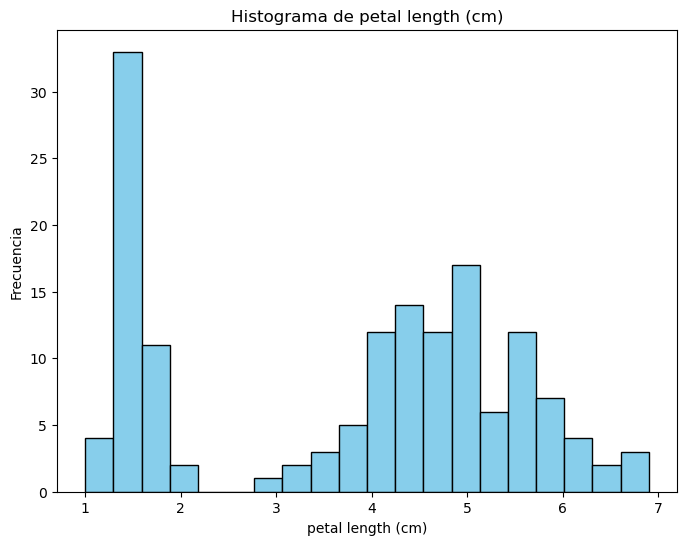

In [21]:
iris2.variable(name = "petal length (cm)")